# Rain in Australia
[https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data?select=weatherAUS.csv)

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
def scatter_plot(dataframe, x_column, y_column, x_max=None, y_max=None):
    """
    Crée un scatter plot entre deux colonnes d'un DataFrame.

    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        x_column (str): Le nom de la colonne pour l'axe x.
        y_column (str): Le nom de la colonne pour l'axe y.
        x_max (float or int, optional): La valeur maximale pour l'axe x.
        y_max (float or int, optional): La valeur maximale pour l'axe y.

    Returns:
        None
    """
    x_data = dataframe[x_column]
    y_data = dataframe[y_column]

    plt.figure(figsize=(10, 6))
    plt.scatter(x_data, y_data, alpha=0.5, color='blue')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Scatter Plot entre {x_column} et {y_column}')
    
    if x_max is not None:
        plt.xlim(0, x_max)
    if y_max is not None:
        plt.ylim(0, y_max)
    
    plt.grid(True)
    plt.show()

In [81]:
def box_plot(dataframe, x_column, y_column, x_max=None, y_max=None):
    """
    Crée un box plot entre deux colonnes d'un DataFrame.

    Args:
        dataframe (pd.DataFrame): Le DataFrame contenant les données.
        x_column (str): Le nom de la colonne pour l'axe x.
        y_column (str): Le nom de la colonne pour l'axe y.
        x_max (float or int, optional): La valeur maximale pour l'axe x.
        y_max (float or int, optional): La valeur maximale pour l'axe y.

    Returns:
        None
    """
    data_temp = dataframe[[x_column, y_column]]
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data_temp)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Box Plot de {y_column} en fonction de {x_column}')
    
    if x_max is not None:
        plt.xlim(0, x_max)
    if y_max is not None:
        plt.ylim(0, y_max)
    
    plt.grid(True)
    plt.show()

In [67]:
def display_nan_proportion(dataframe: pd.DataFrame, dataframe_name: str = "le dataframe"):
    nan_proportions = (dataframe.isna().sum() / len(dataframe)) * 100
    nan_proportions = nan_proportions.sort_values(ascending=False)
    
    plt.figure(figsize=(8, 5))
    sns.barplot(x=nan_proportions.values, y=nan_proportions.index, hue=nan_proportions.index, palette='viridis', legend=False)
    plt.xlabel('Proportion de NaN (%)')
    plt.title(f'Proportions de NaN par colonne dans {dataframe_name}')
    plt.gca().invert_yaxis()  # La colonne avec le plus de NaN en bas
    plt.show()

In [68]:
def combine_values(df, column1, column2, verbose=False):
    result = pd.Series(index=df.index)

    for i, row in df.iterrows():
        if pd.isna(row[column1]) and pd.isna(row[column2]):
            result[i] = np.nan
        elif pd.isna(row[column1]):
            result[i] = row[column2]
        elif pd.isna(row[column2]):
            result[i] = row[column1]
        else:
            result[i] = (row[column1] + row[column2]) / 2
    if verbose:
        # Afficher le nombre de NaN dans les colonnes d'entrée et la colonne de sortie
        num_nan_input1 = df[column1].isna().sum()
        num_nan_input2 = df[column2].isna().sum()
        num_nan_output = result.isna().sum()
        print(f"NaN dans {column1}: {num_nan_input1}")
        print(f"NaN dans {column2}: {num_nan_input2}")
        print(f"NaN dans la colonne de sortie: {num_nan_output}")

    return result

In [69]:
weatherAUS = pd.read_csv('weatherAUS.csv')

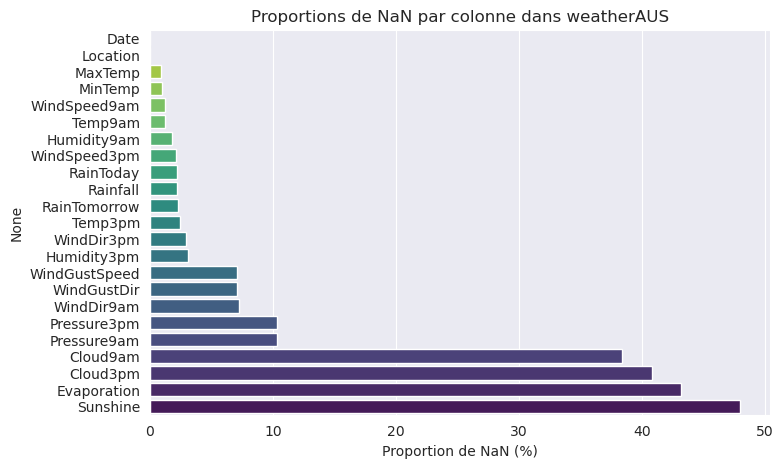

In [70]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

In [71]:
weatherAUS['Temp'] = combine_values(weatherAUS, column1='Temp9am', column2='Temp3pm', verbose=True)
weatherAUS['Humidity'] = combine_values(weatherAUS, column1='Humidity9am', column2='Humidity3pm', verbose=True)
weatherAUS['WindSpeed'] = combine_values(weatherAUS, column1='WindSpeed9am', column2='WindSpeed3pm', verbose=True)
weatherAUS['Pressure'] = combine_values(weatherAUS, column1='Pressure9am', column2='Pressure3pm', verbose=True)
weatherAUS['Cloud'] = combine_values(weatherAUS, column1='Cloud9am', column2='Cloud3pm', verbose=True)
weatherAUS.drop(columns=['Humidity9am', 'Humidity3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am', 'Temp9am', 'Temp3pm'], inplace=True)

NaN dans Temp9am: 1767
NaN dans Temp3pm: 3609
NaN dans la colonne de sortie: 1129
NaN dans Humidity9am: 2654
NaN dans Humidity3pm: 4507
NaN dans la colonne de sortie: 1887
NaN dans WindSpeed9am: 1767
NaN dans WindSpeed3pm: 3062
NaN dans la colonne de sortie: 1213
NaN dans Pressure9am: 15065
NaN dans Pressure3pm: 15028
NaN dans la colonne de sortie: 14804
NaN dans Cloud9am: 55888
NaN dans Cloud3pm: 59358
NaN dans la colonne de sortie: 51744


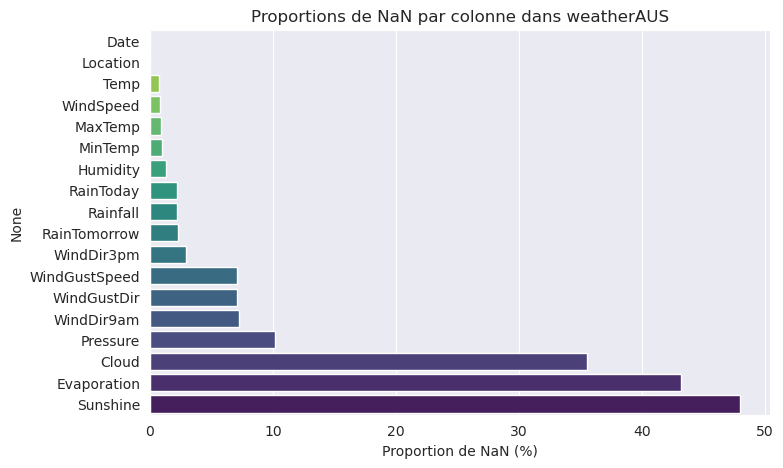

In [79]:
display_nan_proportion(dataframe=weatherAUS, dataframe_name="weatherAUS")

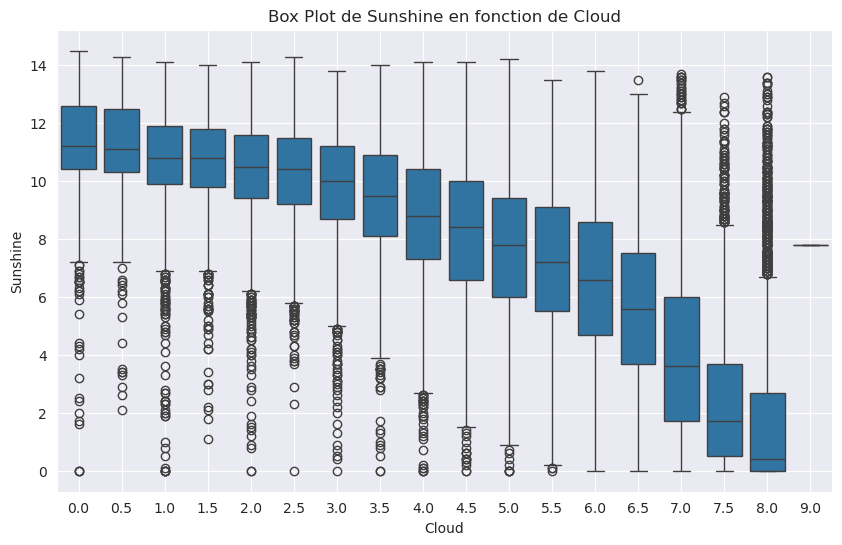

In [82]:
box_plot(dataframe=weatherAUS, x_column="Cloud", y_column="Sunshine")

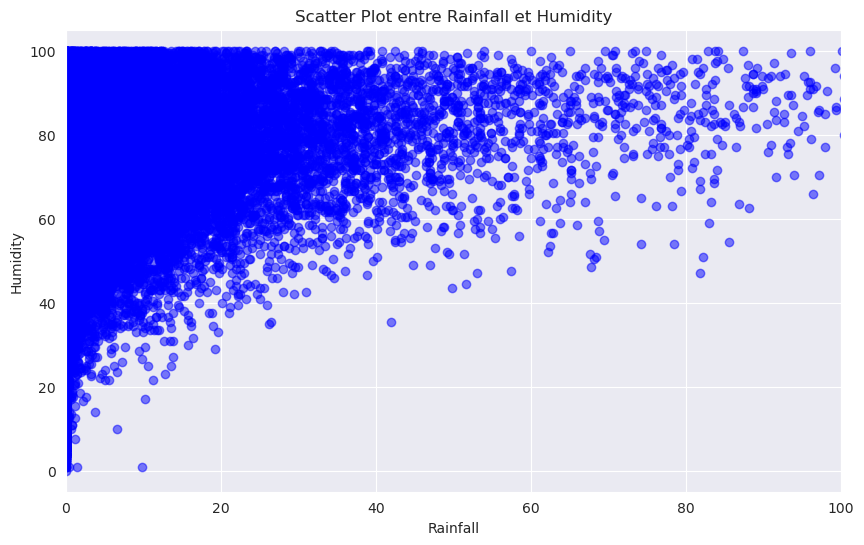

In [80]:
scatter_plot(dataframe=weatherAUS, x_column="Rainfall", y_column="Humidity", x_max=100)

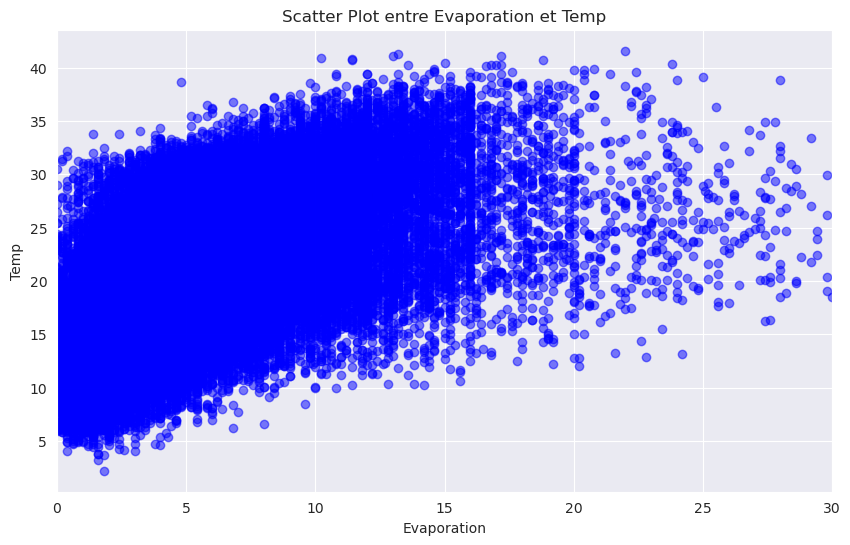

In [78]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='Temp', x_max=30)

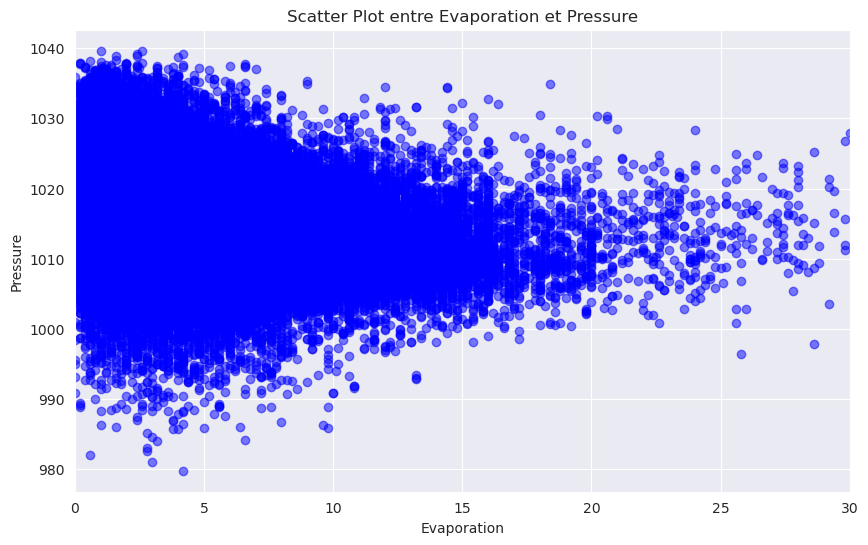

In [85]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='Pressure', x_max=30)

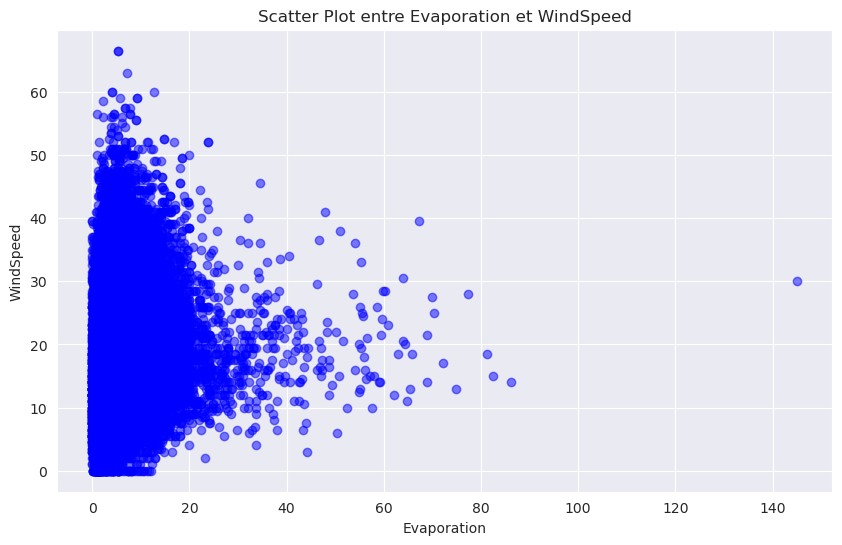

In [89]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindSpeed', x_max=50)

In [ ]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindSpeed', x_max=50)

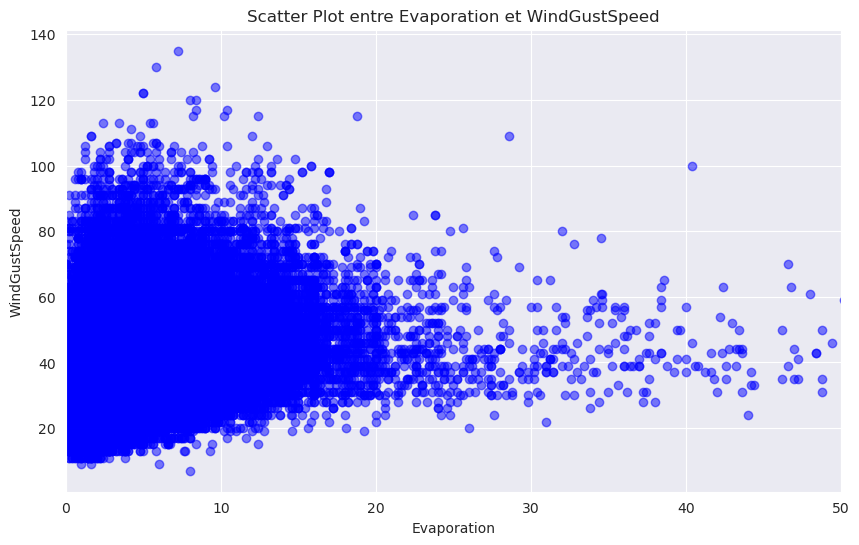

In [90]:
scatter_plot(dataframe=weatherAUS, x_column='Evaporation', y_column='WindGustSpeed', x_max=50)

In [58]:
weatherAUS

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,RainToday,RainTomorrow,Temp,Humidity,WindSpeed,Pressure,Cloud
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,No,No,19.35,46.5,22.0,1007.40,8.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,No,No,20.75,34.5,13.0,1009.20,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,No,No,22.10,34.0,22.5,1008.15,2.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,No,No,22.30,30.5,10.0,1015.20,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,No,No,23.75,57.5,13.5,1008.40,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,No,No,16.25,37.5,12.0,1022.45,NaN
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,No,No,17.70,38.5,11.0,1021.30,NaN
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,No,No,19.30,38.5,9.0,1018.90,NaN
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,No,No,20.55,37.5,10.0,1017.95,2.5


In [73]:
weatherAUS.Evaporation.unique()

array([     nan, 1.20e+01, 1.48e+01, 1.26e+01, 1.08e+01, 1.14e+01,
       1.12e+01, 1.30e+01, 9.80e+00, 1.46e+01, 1.10e+01, 1.28e+01,
       1.38e+01, 1.64e+01, 1.74e+01, 1.60e+01, 1.36e+01, 8.00e+00,
       8.20e+00, 8.60e+00, 1.42e+01, 1.58e+01, 1.62e+01, 1.34e+01,
       1.44e+01, 1.18e+01, 1.56e+01, 1.52e+01, 1.16e+01, 9.60e+00,
       6.60e+00, 6.00e-01, 6.00e+00, 3.00e+00, 2.00e+00, 5.20e+00,
       9.00e+00, 1.02e+01, 1.00e+01, 7.40e+00, 8.40e+00, 9.20e+00,
       9.40e+00, 1.24e+01, 1.04e+01, 7.20e+00, 6.80e+00, 7.60e+00,
       4.40e+00, 6.40e+00, 7.80e+00, 7.00e+00, 8.80e+00, 6.20e+00,
       5.80e+00, 2.00e-01, 2.40e+00, 1.80e+00, 2.20e+00, 2.80e+00,
       5.00e+00, 5.60e+00, 4.80e+00, 4.20e+00, 4.00e+00, 3.20e+00,
       4.60e+00, 3.40e+00, 3.60e+00, 0.00e+00, 1.40e+00, 3.80e+00,
       8.00e-01, 2.60e+00, 1.60e+00, 1.20e+00, 1.00e+00, 5.40e+00,
       1.06e+01, 1.68e+01, 1.70e+01, 2.02e+01, 1.40e+01, 1.72e+01,
       1.22e+01, 1.50e+01, 1.82e+01, 1.32e+01, 4.10e+00, 1.70e